# Exploratory Data Analysis on Swiggy Varanasi Restaurants Dataset

Download dataset here - https://www.kaggle.com/datasets/chinmayshanbhag/swiggy-varanasi-restaurants

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [2]:
swiggy_vns = pd.read_csv('Swiggy_Varanasi.csv')
swiggy_vns.head()

,Restaurant Name,Category,Rating,Cost for two,Area,Locality,Address,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),"North Indian,Biryani,Mughlai,Chinese",3.8,350,Nagwa,Sunderpur,"1st Floor , Near Life Line Hospital, Brij Encl...",False,0
1,Burger King,"American,Fast Food",4.1,350,Sigra,Shastri Nagar,"Ground Floor and First Floor,Tulsi Complex,C-1...",False,0
2,McDonald's,American,4.0,400,Varanasi Cantonment,JHV Mall,"UP Varanasi JHV Mall, Shop No. 19-21/G, JHV M...",False,0
3,Aman E Khas,"Mughlai,Biryani,North Indian,Chinese",3.9,350,Bhelupur,Bhelupur,"Boradway Hotel, Near IP Vijay Mall, Bhelupur, ...",False,0
4,Mahadev momo and coffee corner,Chinese,NaN,200,Sigra,Sigra,"C28/141-k-p, teliyabagh, varanasi nagar nigam ...",False,0


# Information on Data 

In [3]:
swiggy_vns.shape

(667, 9)

In [4]:
swiggy_vns.columns

Index(['Restaurant Name', 'Category', 'Rating', 'Cost for two', 'Area',
       'Locality', 'Address', 'Veg', 'Long Distance Delivery'],
      dtype='object')

**Summary statistics of the dataset**

In [5]:
swiggy_vns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         667 non-null    object 
 1   Category                667 non-null    object 
 2   Rating                  269 non-null    float64
 3   Cost for two            667 non-null    int64  
 4   Area                    667 non-null    object 
 5   Locality                667 non-null    object 
 6   Address                 667 non-null    object 
 7   Veg                     667 non-null    bool   
 8   Long Distance Delivery  667 non-null    int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 42.5+ KB


In [6]:
# We can see that the Rating column has most amount of missing values
# Next we look at description of the dataset
swiggy_vns.describe()

,Rating,Cost for two,Long Distance Delivery
count,269.000000,667.000000,667.000000
mean,3.658364,287.698651,0.226387
std,0.525306,124.776259,0.418806
min,1.200000,2.000000,0.000000
25%,3.500000,200.000000,0.000000
50%,3.800000,250.000000,0.000000
75%,4.000000,350.000000,0.000000
max,4.600000,1400.000000,1.000000


So, from above, we can see that the average cost for two people in any restaurant is atleast 288 rupees.

In [7]:
# Let's check for any duplicated values
swiggy_vns.duplicated().any()

False

In [8]:
# Checking for missing values
swiggy_vns.isnull().sum()

Restaurant Name             0
Category                    0
Rating                    398
Cost for two                0
Area                        0
Locality                    0
Address                     0
Veg                         0
Long Distance Delivery      0
dtype: int64

In [9]:
# We will fill the missing values in 'Rating' column with mean rating
swiggy_vns['Rating'].fillna(swiggy_vns['Rating'].mean(),inplace=True)

In [10]:
swiggy_vns.Rating.isnull().sum()

0

In [11]:
## Drop all unnecessary columns
swiggy_vns.drop(['Address','Area'],axis=1,inplace=True)
swiggy_vns.head()

,Restaurant Name,Category,Rating,Cost for two,Locality,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),"North Indian,Biryani,Mughlai,Chinese",3.800000,350,Sunderpur,False,0
1,Burger King,"American,Fast Food",4.100000,350,Shastri Nagar,False,0
2,McDonald's,American,4.000000,400,JHV Mall,False,0
3,Aman E Khas,"Mughlai,Biryani,North Indian,Chinese",3.900000,350,Bhelupur,False,0
4,Mahadev momo and coffee corner,Chinese,3.658364,200,Sigra,False,0


In [27]:
swiggy_vns.head()

,Restaurant Name,Category,Rating,Cost for two,Locality,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),Others,3.800000,350,others,False,No
1,Burger King,Others,4.100000,350,others,False,No
2,McDonald's,Others,4.000000,400,others,False,No
3,Aman E Khas,Others,3.900000,350,Bhelupur,False,No
4,Mahadev momo and coffee corner,Chinese,3.658364,200,Sigra,False,No


In [14]:
swiggy_vns['Locality'].unique()

array(['Sunderpur', 'Shastri Nagar', 'JHV Mall', 'Bhelupur', 'Sigra',
       'Rathyatra', 'Nadesar', 'Mahmoorganj', 'Lanka', 'Varanasi',
       'Chetganj', 'Durgakund', 'Celestial Building', 'sigra',
       'Sigra Mahmoorganj Rd', 'IIT', 'Chhawani Cantonment',
       'Dr. Anand Xray and ultrasound', 'Ramkatora', 'JHV MALL VARANASI',
       'Pandeypur, Varanasi', 'OPP TRUE VALUE SHOP', 'Kasturba Nagar',
       'Ashapur', 'Lohta road', 'luxa', 'Golghar, Nadeshar',
       'mahmoorganj', 'Kachahari', 'Kakarmatta', 'Bhojuveer', 'pandeypur',
       'sigra varanasi', 'Pandeypur', 'New colony kakarmatta, sunderpur',
       'Godowlia', 'Bhelupur Varanasi', 'Bansphatak',
       'luxa,Ramapura ,Varanasi', 'Kachahri', 'Sarainandan Khojwan',
       'Kanchanpur', 'bhojubeer', 'Near I P Vijay Mall', 'Orderly Bazaar',
       'Nevada Sundarpur', 'Jivan nagar collony, Bajardiha',
       'Near Kal bhairo temple', 'PANDEYPUR', 'karudi', 'Pahariya',
       'lanka', 'Lanka, BHU Road', 'Malviya Kunj, lanka',

Since many of the localities are same but written in capital or small, we will first change them to a single format

In [22]:
# construct a dataframe with keys as the correct word and values as the different words similar to the key
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['Nevada Sundarpur',
                                                         'New colony kakarmatta, sunderpur'],'Sunderpur')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['JHV MALL VARANASI'],'JHV Mall')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['Bhelupur Varanasi'],'Bhelupur')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['mahmoorganj'],'Mahmoorganj')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['sigra','Sigra Mahmoorganj Rd','Celestial Building',
                                                         'sigra varanasi','Near I P Vijay Mall'],'Sigra')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['Kachahri'],'Kachahari')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['bhojubeer'],'Bhojuveer')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['PANDEYPUR','pandeypur','Pandeypur, Varanasi'],'Pandeypur')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['luxa','luxa,Ramapura ,Varanasi'],'Luxa')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['lanka', 'Lanka, BHU Road', 
                                                         'Malviya Kunj, lanka', 'Lanka Varanasi'],'Lanka')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['Golghar, Nadeshar'],'Nadesar')
swiggy_vns['Locality'] = swiggy_vns['Locality'].replace(['Bansphatak'],'Godowlia')
swiggy_vns['Locality'].value_counts()

Sigra                             161
Lanka                             152
Nadesar                           134
IIT                               100
Bhelupur                           24
Mahmoorganj                        21
Chetganj                           12
Pandeypur                           8
Ashapur                             7
Godowlia                            6
Bhojuveer                           5
Sunderpur                           5
JHV Mall                            3
Durgakund                           2
Babatpur                            2
Varanasi                            2
Luxa                                2
Kachahari                           2
Kanchanpur                          1
Pahariya                            1
karudi                              1
Near Kal bhairo temple              1
Bada Lalpur,  Chandmari             1
Jivan nagar collony, Bajardiha      1
Orderly Bazaar                      1
Sarnath                             1
Kasturba Nag

In [24]:
# Since there are many localities having less than 10 restaurants, 
# so we will group them as 'others'
Locality = swiggy_vns['Locality'].value_counts(ascending = True)

locality_lessthanten = Locality[Locality<10]

def handle_locality(value):
    if(value in locality_lessthanten):
        return 'others'
    else:
        return value

swiggy_vns['Locality'] = swiggy_vns['Locality'].apply(handle_locality)
swiggy_vns['Locality'].value_counts()

Sigra          161
Lanka          152
Nadesar        134
IIT            100
others          63
Bhelupur        24
Mahmoorganj     21
Chetganj        12
Name: Locality, dtype: int64

In [25]:
Category = swiggy_vns['Category'].value_counts()

Category_lessthan10 = Category[Category<=10]

def handle_category(value):
    if(value in Category_lessthan10):
        return 'Others'
    else:
        return value
    
swiggy_vns['Category'] = swiggy_vns['Category'].apply(handle_category)
swiggy_vns['Category'].value_counts()

Others          554
Bakery           40
Indian           25
Chinese          20
North Indian     15
Pizzas           13
Name: Category, dtype: int64

In [56]:
#Replace 0 by No and 1 by Yes in Long Distance Delivery column
swiggy_vns['Long Distance Delivery'] = swiggy_vns['Long Distance Delivery'].replace(0,'No')
swiggy_vns['Long Distance Delivery'] = swiggy_vns['Long Distance Delivery'].replace(1,'Yes')
swiggy_vns

,Restaurant Name,Category,Rating,Cost for two,Locality,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),Others,3.800000,350,others,False,No
1,Burger King,Others,4.100000,350,others,False,No
2,McDonald's,Others,4.000000,400,others,False,No
3,Aman E Khas,Others,3.900000,350,Bhelupur,False,No
4,Mahadev momo and coffee corner,Chinese,3.658364,200,Sigra,False,No
...,...,...,...,...,...,...,...
662,The Star Bakery,Bakery,3.658364,200,IIT,True,Yes
663,The Live Bakery,Bakery,3.658364,200,IIT,True,Yes
664,GO GREEN BAKERY,Bakery,3.658364,200,IIT,True,Yes
665,Fresh Cake,Bakery,3.658364,200,IIT,True,Yes


In [30]:
swiggy_vns.head()

,Restaurant Name,Category,Rating,Cost for two,Locality,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),Others,3.800000,350,others,False,No
1,Burger King,Others,4.100000,350,others,False,No
2,McDonald's,Others,4.000000,400,others,False,No
3,Aman E Khas,Others,3.900000,350,Bhelupur,False,No
4,Mahadev momo and coffee corner,Chinese,3.658364,200,Sigra,False,No


# Data Visualization

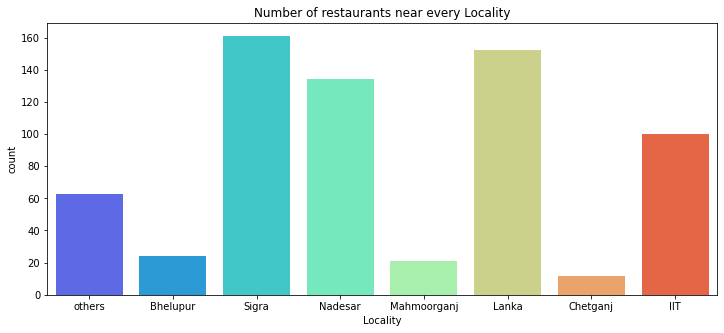

In [35]:
# Countplot of various locations
plt.figure(figsize=(12,5))
sns.countplot(swiggy_vns['Locality'], palette='rainbow')
plt.title('Number of restaurants near every Locality')
plt.show()

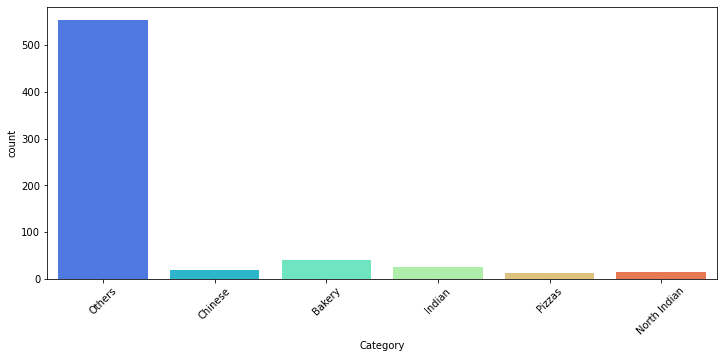

In [36]:
# Countplot of different category of food available
plt.figure(figsize=(12,5))
ax=sns.countplot(swiggy_vns['Category'], palette='rainbow')
plt.xticks(rotation = 45)
plt.show()

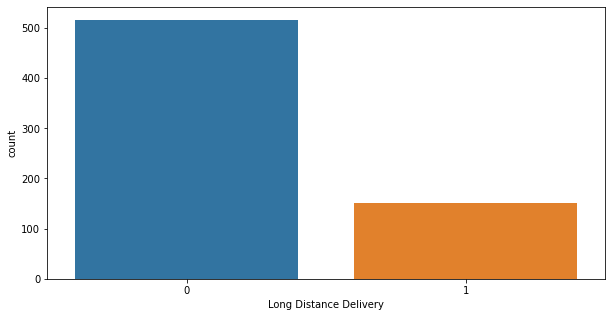

In [39]:
# Most restaurants do not deliver long distance
plt.figure(figsize=(10,5))
sns.countplot('Long Distance Delivery', data = swiggy_vns)
plt.show()

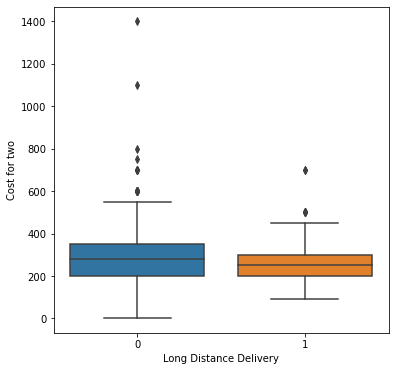

In [40]:
# Visualizing long distance delivery vs Cost for two
plt.figure(figsize=(6,6))
sns.boxplot(x='Long Distance Delivery', y='Cost for two', data = swiggy_vns)
plt.show()

In [52]:
# Visualizing choice for food (veg/non-veg) based on location
swiggy_vns_veg_restaurants = swiggy_vns.groupby(['Locality','Veg'])['Restaurant Name'].count().to_frame()
#df1.to_csv('location_veg.csv')
#df1 = pd.read_csv('location_veg.csv')
swiggy_vns_veg_restaurants = pd.pivot_table(swiggy_vns_veg_restaurants, 
                                            values=None, 
                                            index=['Locality'], 
                                            columns=['Veg'], 
                                            fill_value=0, 
                                            aggfunc=np.sum)
swiggy_vns_veg_restaurants

Restaurant Name     
Veg                   False True
Locality                        
Bhelupur                 15    9
Chetganj                  9    3
IIT                      79   21
Lanka                   121   31
Mahmoorganj              16    5
Nadesar                 104   30
Sigra                   104   57
others                   45   18

Most Vegetarian Restaurants can be found in Sigra

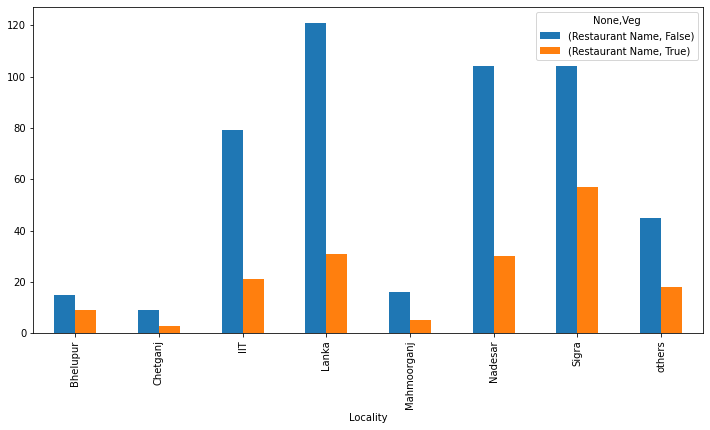

In [54]:
swiggy_vns_veg_restaurants.plot(kind='bar',figsize=(12,6))
plt.show()

In [57]:
# Visualizing long distance delivery, location wise
swiggy_vns_restr_delivery = swiggy_vns.groupby(['Locality','Long Distance Delivery'])['Restaurant Name'].count().to_frame()
swiggy_vns_restr_delivery = pd.pivot_table(swiggy_vns_restr_delivery, 
                                           values=None, 
                                           index=['Locality'], 
                                           columns=['Long Distance Delivery'], 
                                           fill_value=0, 
                                           aggfunc=np.sum)
swiggy_vns_restr_delivery

Restaurant Name    
Long Distance Delivery              No Yes
Locality                                  
Bhelupur                            19   5
Chetganj                            12   0
IIT                                 75  25
Lanka                               92  60
Mahmoorganj                         21   0
Nadesar                             90  44
Sigra                              158   3
others                              49  14

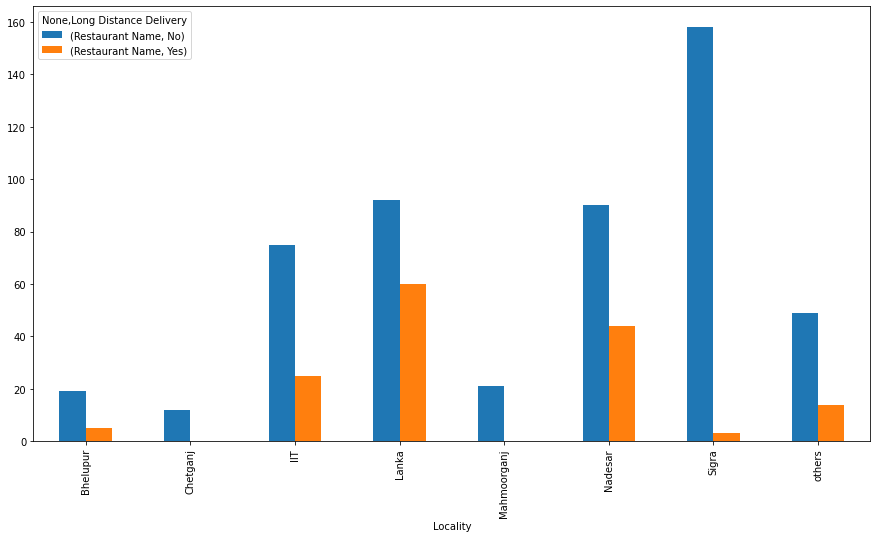

In [59]:
swiggy_vns_restr_delivery.plot(kind='bar',figsize=(15,8))
plt.show()

In [61]:
# Grouping Type of restaurants locality wise
swiggy_vns_restr_category = swiggy_vns.groupby(['Locality','Category'])['Restaurant Name'].count().to_frame()
swiggy_vns_restr_category = pd.pivot_table(swiggy_vns_restr_category, 
                                           values=None, 
                                           index=['Locality'], 
                                           columns=['Category'], 
                                           fill_value=0, 
                                           aggfunc=np.sum)
swiggy_vns_restr_category

Restaurant Name                                          
Category             Bakery Chinese Indian North Indian Others Pizzas
Locality                                                             
Bhelupur                  0       1      0            0     23      0
Chetganj                  2       0      0            0     10      0
IIT                      12       4      5            3     76      0
Lanka                     4       7      3            7    128      3
Mahmoorganj               1       0      0            0     19      1
Nadesar                  14       5      4            2    107      2
Sigra                     6       3     11            2    132      7
others                    1       0      2            1     59      0

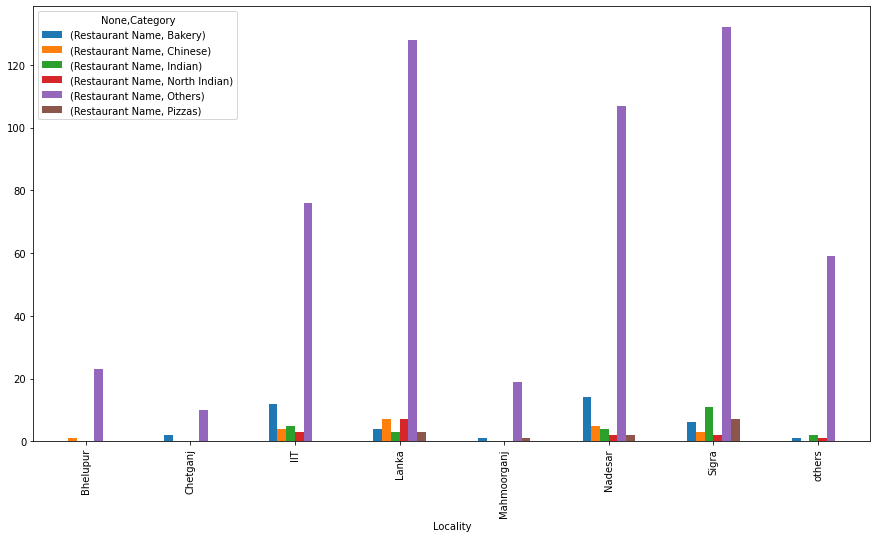

In [62]:
swiggy_vns_restr_category.plot(kind='bar', figsize=(15,8))
plt.show()

In [73]:
# Restaurants according to rating
swiggy_vns_restr_rating = swiggy_vns.groupby('Locality').agg({'Rating':np.mean})
swiggy_vns_restr_rating

,Rating
Locality,
Bhelupur,3.809030
Chetganj,3.609727
IIT,3.537190
Lanka,3.660492
Mahmoorganj,3.847230
Nadesar,3.676699
Sigra,3.665497
others,3.677259


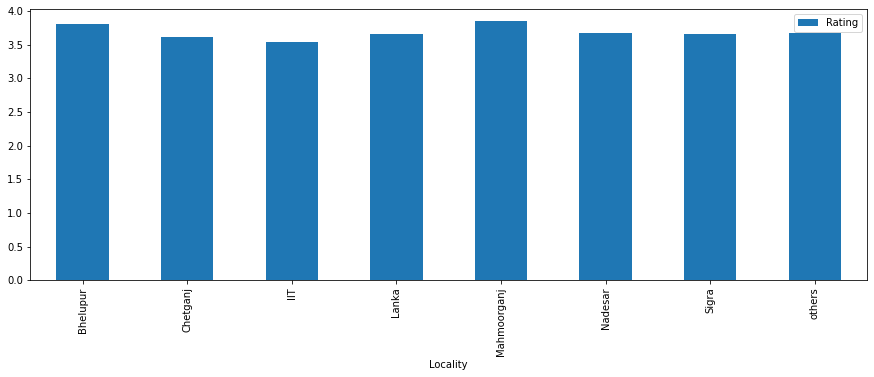

In [75]:
swiggy_vns_restr_rating.plot(kind='bar', figsize=(15,5))
plt.show()

# Conclusion

* We infer that that number of Vegetarian Restaurants in any Locality are much lesser than number of restaurants offering Non-veg. 
* In all the localities, restaurants delivering long distance are few compared to those delivering long distance.
* There is no place near IIT that offers only pizzas. So, if a person wants to open a restaurant near IIT, they can consider opening only pizza restaurant.